## **Introduction**

### Thyroid disease (TD) is one of the most progressive endocrine disorders in the human population today. Prediction of the endocrine disease is a critical task in the field of clinical data analysis. Machine Learning (ML) has shown effective results in the decision making and predictions from the enormous data generated by healthcare domain. Various studies in the prediction of thyroid disease have given only a glimpse using machine learning algorithms. In this project we have proposed three models based on the primary dataset collected from 3772  patients.

## **Import Libraries**

In [145]:
#pandas
import pandas as pd

#numpy
import numpy as np

#matplotlib
import matplotlib.pyplot as plt

#seaborn
import seaborn as sns

#sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report,f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.feature_selection import VarianceThreshold
import pickle
import warnings
warnings.filterwarnings('ignore')

## **Read data from csv**

In [146]:
thyroid_df = pd.read_csv('hypothyroid.csv')
thyroid_df.head()

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,TBG measured,TBG,referral source,binaryClass
0,41,F,f,f,f,f,f,f,f,f,...,t,125,t,1.14,t,109,f,?,SVHC,P
1,23,F,f,f,f,f,f,f,f,f,...,t,102,f,?,f,?,f,?,other,P
2,46,M,f,f,f,f,f,f,f,f,...,t,109,t,0.91,t,120,f,?,other,P
3,70,F,t,f,f,f,f,f,f,f,...,t,175,f,?,f,?,f,?,other,P
4,70,F,f,f,f,f,f,f,f,f,...,t,61,t,0.87,t,70,f,?,SVI,P


In [147]:
for col in thyroid_df.columns:
    print(thyroid_df[col].value_counts())

age
59     95
60     91
70     90
73     81
55     81
       ..
4       1
5       1
455     1
6       1
?       1
Name: count, Length: 94, dtype: int64
sex
F    2480
M    1142
?     150
Name: count, dtype: int64
on thyroxine
f    3308
t     464
Name: count, dtype: int64
query on thyroxine
f    3722
t      50
Name: count, dtype: int64
on antithyroid medication
f    3729
t      43
Name: count, dtype: int64
sick
f    3625
t     147
Name: count, dtype: int64
pregnant
f    3719
t      53
Name: count, dtype: int64
thyroid surgery
f    3719
t      53
Name: count, dtype: int64
I131 treatment
f    3713
t      59
Name: count, dtype: int64
query hypothyroid
f    3538
t     234
Name: count, dtype: int64
query hyperthyroid
f    3535
t     237
Name: count, dtype: int64
lithium
f    3754
t      18
Name: count, dtype: int64
goitre
f    3738
t      34
Name: count, dtype: int64
tumor
f    3676
t      96
Name: count, dtype: int64
hypopituitary
f    3771
t       1
Name: count, dtype: int64
psych
f    3588

## **Feature Selection and Data Cleaning**

In [148]:
thyroid_df.rename(columns={'binaryClass':'Label'},inplace=True)

In [149]:
thyroid_df.replace('?',np.nan,inplace=True)

In [150]:
thyroid_df=thyroid_df.replace({"t":1,"f":0})

In [151]:
VarThresh = VarianceThreshold(threshold=0.1)
VarThresh.fit(thyroid_df[['on thyroxine','query on thyroxine','on antithyroid medication','query hypothyroid', 'query hyperthyroid','hypopituitary', 'psych']])
VarThresh.get_support()

array([ True, False, False, False, False, False, False])

In [152]:
thyroid_df.drop(['T3 measured','TSH measured','TT4 measured','T4U measured','FTI measured','TBG measured','TBG','referral source','on thyroxine','query on thyroxine','on antithyroid medication','query hypothyroid', 'query hyperthyroid','hypopituitary', 'psych'],axis=1,inplace=True)

In [153]:
thyroid_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3772 entries, 0 to 3771
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              3771 non-null   object
 1   sex              3622 non-null   object
 2   sick             3772 non-null   int64 
 3   pregnant         3772 non-null   int64 
 4   thyroid surgery  3772 non-null   int64 
 5   I131 treatment   3772 non-null   int64 
 6   lithium          3772 non-null   int64 
 7   goitre           3772 non-null   int64 
 8   tumor            3772 non-null   int64 
 9   TSH              3403 non-null   object
 10  T3               3003 non-null   object
 11  TT4              3541 non-null   object
 12  T4U              3385 non-null   object
 13  FTI              3387 non-null   object
 14  Label            3772 non-null   object
dtypes: int64(7), object(8)
memory usage: 442.2+ KB


In [154]:
thyroid_df['thyroid surgery'].value_counts()

thyroid surgery
0    3719
1      53
Name: count, dtype: int64

In [155]:
cols = ['age','FTI','TSH','T3','TT4','T4U']
for i in cols:
    thyroid_df[i] = pd.to_numeric(thyroid_df[i])

In [156]:
thyroid_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3772 entries, 0 to 3771
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              3771 non-null   float64
 1   sex              3622 non-null   object 
 2   sick             3772 non-null   int64  
 3   pregnant         3772 non-null   int64  
 4   thyroid surgery  3772 non-null   int64  
 5   I131 treatment   3772 non-null   int64  
 6   lithium          3772 non-null   int64  
 7   goitre           3772 non-null   int64  
 8   tumor            3772 non-null   int64  
 9   TSH              3403 non-null   float64
 10  T3               3003 non-null   float64
 11  TT4              3541 non-null   float64
 12  T4U              3385 non-null   float64
 13  FTI              3387 non-null   float64
 14  Label            3772 non-null   object 
dtypes: float64(6), int64(7), object(2)
memory usage: 442.2+ KB


## **Handle Missing Values**

In [157]:
thyroid_df.isnull().sum()

age                  1
sex                150
sick                 0
pregnant             0
thyroid surgery      0
I131 treatment       0
lithium              0
goitre               0
tumor                0
TSH                369
T3                 769
TT4                231
T4U                387
FTI                385
Label                0
dtype: int64

In [158]:
miss_cols = ['FTI','TSH','T3','TT4','T4U']
for i in miss_cols:
    thyroid_df[i] = thyroid_df[i].fillna(thyroid_df[i].mean())

In [159]:
thyroid_df.dropna(inplace=True)

In [160]:
thyroid_df.isnull().sum()

age                0
sex                0
sick               0
pregnant           0
thyroid surgery    0
I131 treatment     0
lithium            0
goitre             0
tumor              0
TSH                0
T3                 0
TT4                0
T4U                0
FTI                0
Label              0
dtype: int64

In [161]:
thyroid_df = thyroid_df.drop(1364)

In [162]:
thyroid_df.TT4 = thyroid_df.TT4.astype(int)
thyroid_df.FTI = thyroid_df.FTI.astype(int)
thyroid_df.age = thyroid_df.age.astype(int)

In [163]:
thyroid_df

,age,sex,sick,pregnant,thyroid surgery,I131 treatment,lithium,goitre,tumor,TSH,T3,TT4,T4U,FTI,Label
0,41,F,0,0,0,0,0,0,0,1.300000,2.5000,125,1.140,109,P
1,23,F,0,0,0,0,0,0,0,4.100000,2.0000,102,0.995,110,P
2,46,M,0,0,0,0,0,0,0,0.980000,2.0135,109,0.910,120,P
3,70,F,0,0,0,0,0,0,0,0.160000,1.9000,175,0.995,110,P
4,70,F,0,0,0,0,0,0,0,0.720000,1.2000,61,0.870,70,P
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3767,30,F,0,0,0,0,0,0,1,5.086766,2.0135,108,0.995,110,P
3768,68,F,0,0,0,0,0,0,0,1.000000,2.1000,124,1.080,114,P
3769,74,F,0,0,0,0,0,0,0,5.100000,1.8000,112,1.070,105,P
3770,72,M,0,0,0,0,0,0,0,0.700000,2.0000,82,0.940,87,P


## **EDA**

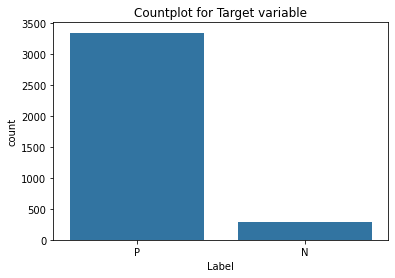

In [164]:
sns.countplot(x='Label',data=thyroid_df)
plt.title("Countplot for Target variable");

In [165]:
positive_df = thyroid_df[thyroid_df.Label=='P']

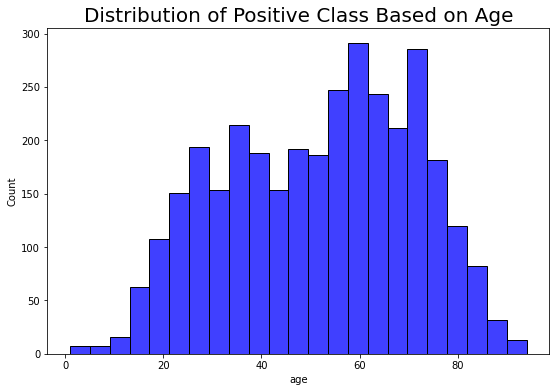

In [166]:
plt.figure(figsize=(9,6))
sns.histplot(x='age',data=positive_df,color='blue')
plt.title("Distribution of Positive Class Based on Age",{'fontsize':20});

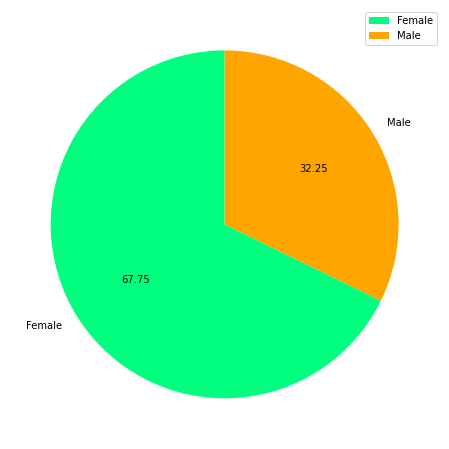

In [167]:
plt.figure(figsize=(10,8))
plt.pie(x=positive_df.sex.value_counts(),
        labels=['Female','Male'],
        startangle = 90,
        colors=['springgreen','orange'],
        autopct='%.2f'
       );
plt.legend();

## **Inference :**
### Female patients who has disease is greater than male patients.

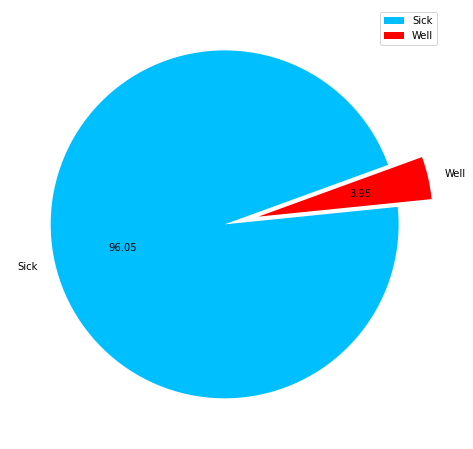

In [168]:
plt.figure(figsize=(8,8))
plt.pie(x=positive_df.sick.value_counts(),
        labels=['Sick','Well'],
        startangle = 20,
        colors=['deepskyblue','red'],
        autopct='%.2f',
        explode=[0,0.2]
       );
plt.legend();

## **Transform non-numerical labels to numerical labels.**

In [169]:
thyroid_df['sex']=thyroid_df['sex'].replace({"F":1,"M":0})

In [170]:
# output1 = open('sex_lbl.pkl', 'wb')
# pickle.dump(s_encoder, output1)
# output1.close()
# output2 = open('surgery.pkl', 'wb')
# pickle.dump(th_encoder, output2)
# output2.close()

In [171]:
thyroid_df["Label"] = thyroid_df["Label"].replace({"P":1,"N":0})
thyroid_df

,age,sex,sick,pregnant,thyroid surgery,I131 treatment,lithium,goitre,tumor,TSH,T3,TT4,T4U,FTI,Label
0,41,1,0,0,0,0,0,0,0,1.300000,2.5000,125,1.140,109,1
1,23,1,0,0,0,0,0,0,0,4.100000,2.0000,102,0.995,110,1
2,46,0,0,0,0,0,0,0,0,0.980000,2.0135,109,0.910,120,1
3,70,1,0,0,0,0,0,0,0,0.160000,1.9000,175,0.995,110,1
4,70,1,0,0,0,0,0,0,0,0.720000,1.2000,61,0.870,70,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3767,30,1,0,0,0,0,0,0,1,5.086766,2.0135,108,0.995,110,1
3768,68,1,0,0,0,0,0,0,0,1.000000,2.1000,124,1.080,114,1
3769,74,1,0,0,0,0,0,0,0,5.100000,1.8000,112,1.070,105,1
3770,72,0,0,0,0,0,0,0,0,0.700000,2.0000,82,0.940,87,1


## **Split original data into training data and testing data.**

In [172]:
X = thyroid_df.drop('Label',axis=1)
y = thyroid_df.Label

In [173]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=11)

## **Handle Imbalance Data**

In [174]:
smote = SMOTE(random_state=12)

x_smote, y_smote = smote.fit_resample(X_train, y_train)

In [175]:
print("Shape before the Oversampling : ",X_train.shape)
print("Shape after the Oversampling : ",x_smote.shape)


Shape before the Oversampling :  (2896, 14)
Shape after the Oversampling :  (5340, 14)


In [176]:
unique,count=np.unique(y_smote,return_counts=True)
y_smote_value_count={k:v for(k,v) in zip(unique,count)}
y_smote_value_count

{0: 2670, 1: 2670}

### XGB Classifier

In [177]:
import xgboost as xgb
from sklearn.metrics import accuracy_score


# Define XGBoost classifier with specified feature names
xgb_clf = xgb.XGBClassifier(objective='multi:softmax', num_class=len(set(y)))

# Train and test the classifier as usual


# Train the classifier
xgb_clf.fit(x_smote, y_smote)

# Predict on the test set
y_pred = xgb_clf.predict(x_smote)

# Calculate accuracy
accuracy = accuracy_score(y_test, xgb_clf.predict(X_test))
print(confusion_matrix(y_test, xgb_clf.predict(X_test)))
print("Accuracy:", accuracy)
print(classification_report(y_test, xgb_clf.predict(X_test)))

[[ 48   6]
 [  4 666]]
Accuracy: 0.9861878453038674
              precision    recall  f1-score   support

           0       0.92      0.89      0.91        54
           1       0.99      0.99      0.99       670

    accuracy                           0.99       724
   macro avg       0.96      0.94      0.95       724
weighted avg       0.99      0.99      0.99       724



In [178]:
# test_query1=X_test.iloc[0].values.reshape(1,-1)
# test_query1
# test_query2=X_test.iloc[1].values.reshape(1,-1)
# test_query2
c=0
for i in range(len(X_test)):
    # print(xgb_clf.predict(X_test.iloc[i].values.reshape(1,-1)),[y_test.iloc[i]])
    if(xgb_clf.predict(X_test.iloc[i].values.reshape(1,-1))==[y_test.iloc[i]]):
        c+=1
print(c/len(X_test))

0.9861878453038674


In [179]:
# result1=xgb_clf.predict(test_query1)
# print(result1)
# print([y_test.iloc[0]])
# result2=xgb_clf.predict(test_query2)
# print(result2)
# print(y_test.iloc[1])

In [180]:
import pickle

with open('model3.pkl','wb') as f:
    pickle.dump(xgb_clf,f)